<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Gradient_Descent_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gradient Descent from Scratch

## Learning Objectives

At the end of the experiment, participants will be able to :

* understand the intuition behind Gradient Descent
* implement Batch Gradient Descent from scratch
* implement Stochastic Gradient Descent from scratch

## Overview

In general terms Gradient means slope or slant of a surface. Gradient Descent aims to minimize the cost function. A function reaches its minimum value when the slope is equal to 0. Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the minimum point of that function.

#### Importing required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Implementing  Equation --> $y=3x+1$

In [ ]:
x1=np.linspace(-3,3,7)
x1

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [ ]:
y1=3*x1+1
y1

array([-8., -5., -2.,  1.,  4.,  7., 10.])

### Implementing  Equation --> $y=3x+1$ --> Using  Matrix Concepts

![](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/st_line_into_matrix.jpg)



#### Calculating y for all values of x  in one shot in eqn  y = 3x + 1
#### Taking X= [-3, -2 ,  -1,   0,   1,  2,   3 ]

In [ ]:
## Making array of coefficient of y=mx+c | y=3x+1
theta=np.array([[1,3]]) ## theta_0(c)=1,theta_1(m)=3
print('theta :\n', theta,'\n')
print('shape of theta : ',theta.shape)
print('Transpose of theta : \n',theta.T)
print('shape of theta transpose : ',theta.T.shape)

theta :
 [[1 3]] 

shape of theta :  (1, 2)
Transpose of theta : 
 [[1]
 [3]]
shape of theta transpose :  (2, 1)


In [ ]:
## Creating X array
x1=np.linspace(-3,3,7)
X1=x1.reshape(-1,1)# Converting one dimensional x1 into 2D (multiple row and one column) and storing as X1
print('X1 :\n',X1,'\n')
X_values=np.hstack((np.ones((7,1)),X1))
print('X_values :\n',X_values, '\n')
print('shape of X_values : ',X_values.shape)

X1 :
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]] 

X_values :
 [[ 1. -3.]
 [ 1. -2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]] 

shape of X_values :  (7, 2)


In [ ]:
### Finally implementing y=mx+c in array format
y_values=np.dot(X_values,theta.T) # shape tracking : (7,2) @ (2,1) -->(7,1) # X_values.dot(theta.T)
print('Y_Values : \n ',y_values,'\n')
print('shape of y_values : ',y_values.shape)

Y_Values : 
  [[-8.]
 [-5.]
 [-2.]
 [ 1.]
 [ 4.]
 [ 7.]
 [10.]] 

shape of y_values :  (7, 1)


### Importing Data

In [ ]:
#@title Download dataset
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/data1.txt
print("Data downloaded successfully!")

Data downloaded successfully!


In [ ]:
data = pd.read_csv('data1.txt',header=None)
data.rename(columns = {0:'Population', 1:'Profit'}, inplace=True)
data.head(4)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


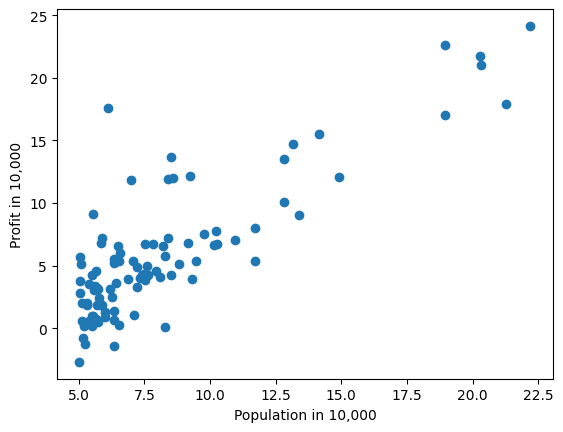

In [ ]:
plt.scatter(data.Population, data.Profit)
plt.xlabel('Population in 10,000')
plt.ylabel('Profit in 10,000')
plt.show()

### Separating feature X and output Y

In [ ]:
## Separating feature i.e. x
x = data['Population'].values
m = len(x)
print('Number of sample in data: ', m)

x = x.reshape(-1,1)
print('shape small x : ',x.shape)

ones = np.ones((97,1))
X = np.hstack([ones,x])
print('shape capital X : ',X.shape)
print('displaying first 4 row of capital X : \n',X[:4])

## Separating target i.e. y
y = data['Profit'].values
y = y.reshape(-1,1)
print('shape y : ',y.shape)


Number of sample in data:  97
shape small x :  (97, 1)
shape capital X :  (97, 2)
displaying first 4 row of capital X : 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]]
shape y :  (97, 1)


In [ ]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [ ]:
print(y[:4])

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]]


### Gradient Calculation
* First Eqn is gradient of cost with respect to theta_0
* Second Eqn is gradient of cost with respect to theata_1

![](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Gradient_calculation.jpg)

### Now implementing exactly these two Eqn in syntax:

### Assuming theta

In [ ]:
np.random.seed(0)
theta = np.random.randn(2,1)  # first value=c, second value=m
print('theta :\n', theta,'\n')
print('shape of theta : ',theta.shape, '\n')
print('shape of X',X.shape)

theta :
 [[1.76405235]
 [0.40015721]] 

shape of theta :  (2, 1) 

shape of X (97, 2)


#### Calculating gradient with respect to theta_0

In [ ]:
(1/m) * np.sum((X.dot(theta) - y))    ## Ypredicted : X.dot(theta) , here y= original y

-0.809879916743859

#### Calculating gradient with respect to theta_1

In [ ]:
(1/m) * np.sum((X.dot(theta) - y) * x)

-18.360160903168417

In [ ]:
A = (X.dot(theta) - y)     ## Error e=(yp-yo)
A ## (97,1)

array([[-13.3829471 ],
       [ -5.15419865],
       [ -8.48916846],
       [ -7.28756669],
       [ -2.71440644],
       [ -6.76746979],
       [  0.4074877 ],
       [ -6.8033591 ],
       [ -2.23914797],
       [ -0.02991303],
       [  0.79703012],
       [ -8.07312095],
       [  0.90345378],
       [ -2.09706578],
       [  3.30503911],
       [  0.40375803],
       [ -0.99358696],
       [  3.25612884],
       [  0.68510313],
       [ -0.79581607],
       [  1.10206532],
       [-11.89176104],
       [ -0.30204456],
       [ -0.89201314],
       [  0.90838719],
       [-13.29296934],
       [ -6.60373099],
       [ -0.89812512],
       [ -7.65547628],
       [-13.49825716],
       [  5.08583807],
       [ -1.59575175],
       [ -6.66921376],
       [  2.27219859],
       [ -1.4928168 ],
       [  0.37635954],
       [  0.88728509],
       [  0.6146537 ],
       [ -3.21652973],
       [ -1.19098885],
       [  3.37109236],
       [  0.60663433],
       [  1.06369294],
       [  1

### Combining both into one equation:
* Here for simplicity only 3 rows of data (in both X and A matrix) have been shown, actually it has 'm' rows  containing all the data
* X is feature matrix
* **A** is the resulting matrix of error calculation i.e. result of eqn --> X.dot(theta)-Y    

![](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/both_grad_in_one.jpg)

### Note the two elements of the resulting matrix:
* The first element is sum of each error, i.e. gradient with respect to theta_0, see the eqn above.
* The second element is the sum of the element-wise product of each error and  x, i.e. gradient with respect to thrta_1.
* Thus if we, multiply X transpose with A we can get both gradients in one shot, as given below:

In [ ]:
(1/m) * (X.T).dot(X.dot(theta) - y)

array([[ -0.80987992],
       [-18.3601609 ]])

### Applying Gradient Descent


### Initialization of theta

In [ ]:
np.random.seed(0)
theta = np.random.randn(2,1)  # first value=c, second value=m
theta

array([[1.76405235],
       [0.40015721]])

In [ ]:
a = 0.01      # Learning Rate

### Gradient calculation

In [ ]:
grad = (1/m) * (X.T).dot(X.dot(theta) - y)

### Gradient Descent




In [ ]:
theta = theta - a*grad
theta

array([[1.77215115],
       [0.58375882]])

#### Complete implementation

In [ ]:
## Theta initialization
np.random.seed(0)
theta = np.random.randn(2,1)  # first value=c, second value=m
print(theta)
n_iteration = 10000 ## number of iteration
a = 0.01 # Learning rate
for i_iter in range(n_iteration):
  grad = (1/m) * (X.T).dot(X.dot(theta) - y) ##Gradient calculation
  theta = theta - a*grad
print(theta)         ## final updated theta after certain loop


[[1.76405235]
 [0.40015721]]
[[-3.8957808 ]
 [ 1.19303364]]


### Cost Calculation

![](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/cost_cal.jpg)



In [ ]:
c = (1/(2*m)) * np.sum((np.square(X.dot(theta) - y)))
c

4.476971375975179

### Including cost calculation for each iteration inside loop i.e. calculating cost for each updated theta:

In [ ]:
## Theta initialization
np.random.seed(0)
theta = np.random.randn(2,1)  # first value=c, second value=m
print(theta)
#c = np.zeros((m,1)) # zero matrix initialization for storing cost values
n_iteration = 50000 ## number of iterations
c = np.zeros((n_iteration,1))
a = 0.001   ## Learning rate
for i_iter in range(n_iteration):
  grad = (1/m) * (X.T).dot(X.dot(theta) - y) ##Gradient calculation
  theta = theta - a*grad
  c[i_iter,0] = (1/(2*m)) * np.sum((np.square(X.dot(theta) - y)))

print(theta) ## final updated theta after certain loop
print(i_iter)


[[1.76405235]
 [0.40015721]]
[[-3.89508925]
 [ 1.19296416]]
49999


In [ ]:
c[1,0]

8.866839075125593

In [ ]:
print(c)

[[9.13983891]
 [8.86683908]
 [8.63672102]
 ...
 [4.47697142]
 [4.47697142]
 [4.47697142]]


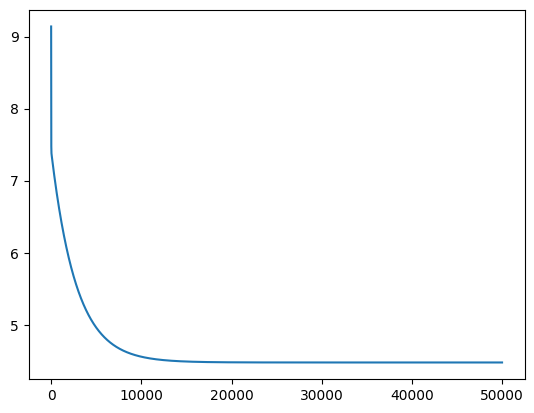

In [ ]:
## Plotting  cost funtion. Cost must decrease in each step if our code is implemented correctly.
plt.plot(c)

In [ ]:
theta # y= 1.09893556 x -2.95911664

array([[-3.89508925],
       [ 1.19296416]])

In [ ]:
yp = X.dot(theta)  # This is predicted y for each x
yp

array([[ 3.39404108],
       [ 2.69925875],
       [ 6.26729527],
       [ 4.45947737],
       [ 3.09544215],
       [ 6.10541003],
       [ 5.02398802],
       [ 6.33827663],
       [ 3.8427149 ],
       [ 2.13486741],
       [ 2.91757119],
       [13.00205515],
       [ 2.94536726],
       [ 6.13583061],
       [ 2.8340637 ],
       [ 2.52234217],
       [ 3.69860483],
       [ 2.2249362 ],
       [ 3.77519313],
       [ 4.54012175],
       [ 3.48828525],
       [20.28629433],
       [ 2.6544033 ],
       [ 3.65172134],
       [ 2.74363702],
       [18.70561681],
       [11.40825503],
       [ 9.17621908],
       [11.82340656],
       [22.59229405],
       [ 2.37083572],
       [ 3.9658288 ],
       [ 7.13768192],
       [ 3.133617  ],
       [ 5.90045879],
       [ 5.56917264],
       [ 5.76302931],
       [ 2.79302573],
       [11.41779874],
       [ 3.68428926],
       [ 2.55514868],
       [ 4.3154866 ],
       [10.07213517],
       [ 2.99272794],
       [ 5.43949743],
       [ 4

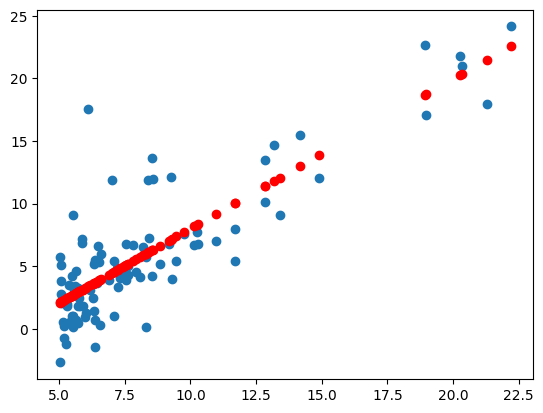

In [ ]:
plt.scatter(data.Population, data.Profit) ## Original data
plt.plot(x,yp,'ro') ##  x versus predicted y in red color

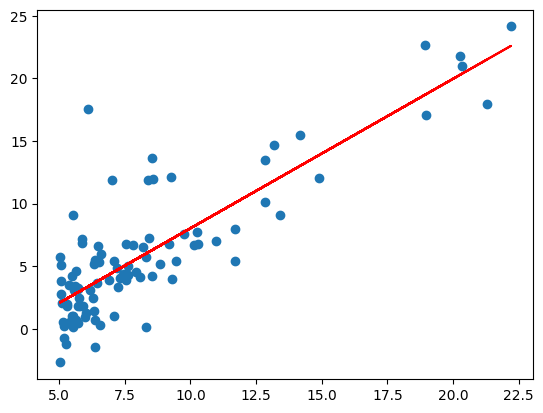

In [ ]:
plt.scatter(data.Population, data.Profit) ## Original data
plt.plot(x,yp,'r-')

### Prediction for any new instance

In [ ]:
## Making function for prediction
def predict(x):
    theta = np.array([[-3.89578081], [ 1.19303364]])
    X1 = np.array([[1,x]])
    yp = X1.dot(theta)
    return yp[0,0]

In [ ]:
predict(20)

19.964891989999995

### **Self Learning:**  Implementation of Stochastic Gradient Descent Algorithm

In [ ]:
# Displaying shape of feature, target, and  first value of each array to feed into SGD
print(x.shape, x[0])
print(X.shape, X[0])
print(y.shape,y[0])

(97, 1) [6.1101]
(97, 2) [1.     6.1101]
(97, 1) [17.592]


In [ ]:
n_epoch = 50
t0, t1 = 5, 500 ## learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(x)
cost = []

for epoch in range(n_epoch):
    for i in range(m): # In every epoch, the weights are updated exactly m (the number of samples in the data set) numbers of times.
        random_index = np.random.randint(m)
        Xi = X[random_index:random_index+1]  # A single sample is picked randomly, and weights are updated for each sample at a time.
        Yi = y[random_index:random_index+1]
        grad = Xi.T.dot((Xi.dot(theta)-Yi))  # Gradient calculation
        alpha = learning_schedule(epoch*m+i) # Learning rate is updated according to the learning_schedule function.
        theta = theta-alpha*grad             # Update of weights
    cost.append((1/(2*m))*np.sum(np.square((X.dot(theta)-y)))) # Tracking of cost for each epoch

print(theta)

[[-3.41367752]
 [ 1.17266871]]


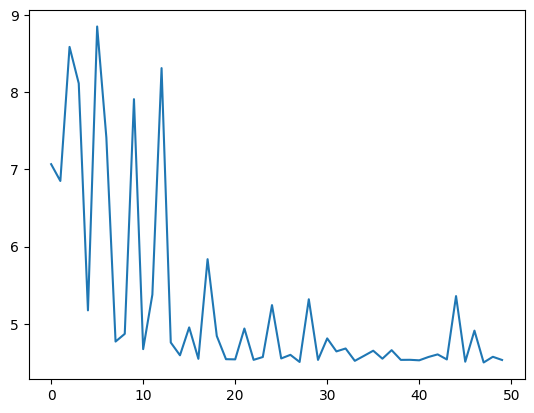

In [ ]:
# Displaying Cost vs Epoch
plt.plot(cost)

**Comparison of Gradient Descent Variants**

![img](https://cdn.iisc.talentsprint.com/CDS/Images/Gradient_descent_variants_comparison.JPG)

To know more about gradient descent variants, click [here](https://hackernoon.com/demystifying-different-variants-of-gradient-descent-optimization-algorithm-19ae9ba2e9bc).